In [7]:
import os
os.environ["MODEL_DIR"] = './model_test'
os.environ["DATA_DIR"] = '../test_train_data/2017019770001_kwonyuna'

In [9]:
import nlpaug
import nlpaug.augmenter.audio as naa
nlpaug.__version__

'0.0.14'

In [10]:
import librosa
import librosa.display as librosa_display
import matplotlib.pyplot as plt

file_path = os.environ.get("DATA_DIR") + '/1.wav'
data, sr = librosa.load(file_path, sr=8000, mono=True, duration=50)

37.63625


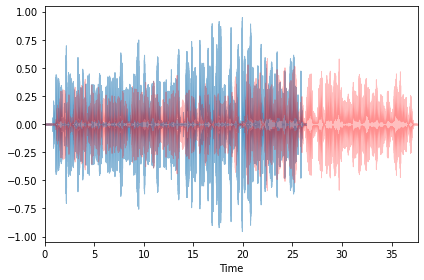

In [20]:
aug = naa.SpeedAug(zone=(0,1), factor=(0.67,0.69))
augmented_data = aug.augment(data)

librosa_display.waveplot(data, sr=sr, alpha=0.5)
librosa_display.waveplot(augmented_data, sr=sr, color='r', alpha=0.25)

print(len(augmented_data)/sr)
plt.tight_layout()
plt.show()

20.265625


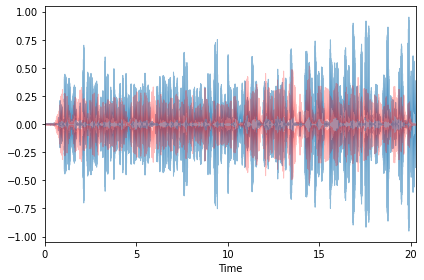

In [21]:
aug = naa.SpeedAug(zone=(0,1), factor=(1.34,1.35))
augmented_data = aug.augment(data)

librosa_display.waveplot(data, sr=sr, alpha=0.5)
librosa_display.waveplot(augmented_data, sr=sr, color='r', alpha=0.25)

print(len(augmented_data)/sr)
plt.tight_layout()
plt.show()

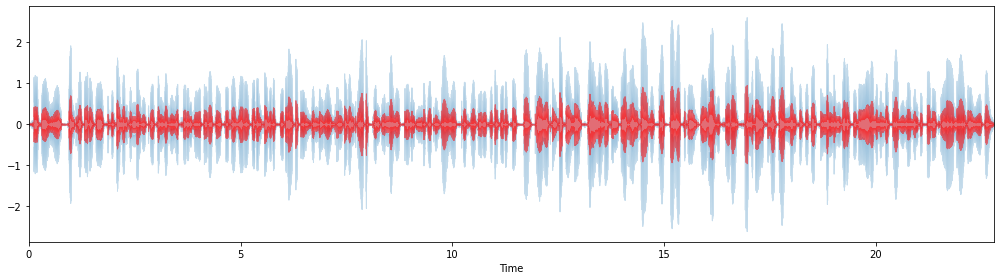

In [236]:
aug = naa.LoudnessAug(loudness_factor=(2, 5),zone=(0, 1))
augmented_data = aug.augment(data)

librosa_display.waveplot(augmented_data, sr=sr, alpha=0.25)
librosa_display.waveplot(data, sr=sr, color='r', alpha=0.5)

plt.tight_layout()
plt.show()

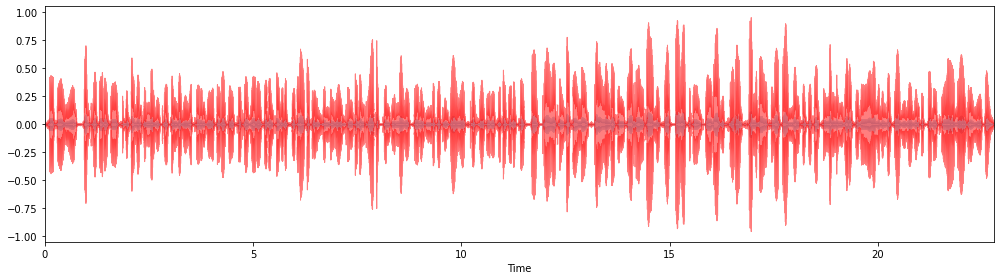

In [242]:
aug = naa.LoudnessAug(loudness_factor=(0, 1),zone=(0, 1)) 
# aug = naa.LoudnessAug(loudness_factor=(0, 0.5),zone=(0, 1)) --3
# aug = naa.LoudnessAug(loudness_factor=(5, 8),zone=(0, 1)) --4
augmented_data = aug.augment(data)

librosa_display.waveplot(augmented_data, sr=sr, alpha=0.25)
librosa_display.waveplot(data, sr=sr, color='r', alpha=0.5)

plt.tight_layout()
plt.show()

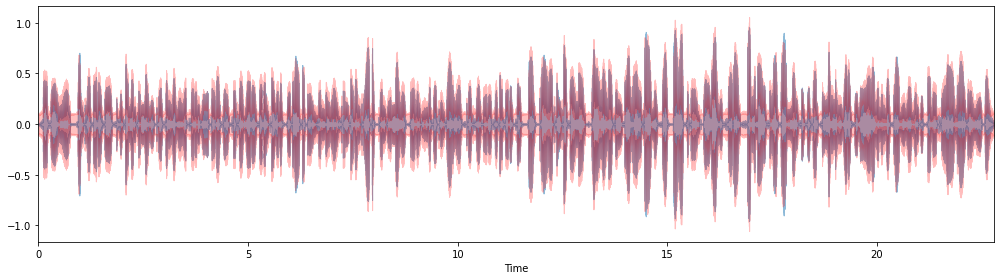

In [231]:
aug = naa.NoiseAug(noises= [[0.1]], zone=(0,1))
augmented_data = aug.augment(data)

librosa_display.waveplot(data, sr=sr, alpha=0.5)
librosa_display.waveplot(augmented_data, sr=sr, color='r', alpha=0.25)

plt.tight_layout()
plt.show()

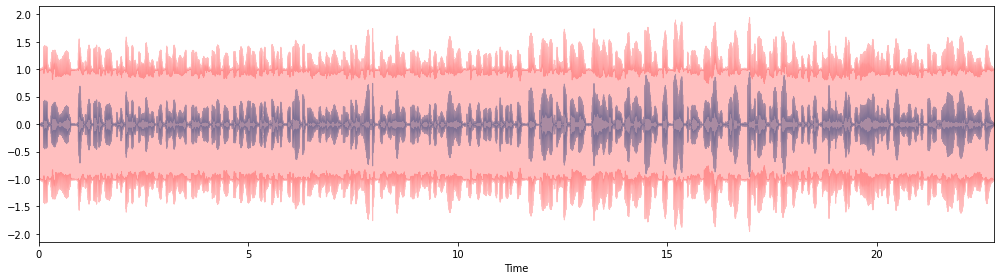

In [260]:
# aug = naa.NoiseAug(noises= [[0.2]]) --4
aug = naa.NoiseAug(noises= [[1]], zone=(0,1))
augmented_data = aug.augment(data)

librosa_display.waveplot(data, sr=sr, alpha=0.5)
librosa_display.waveplot(augmented_data, sr=sr, color='r', alpha=0.25)

plt.tight_layout()
plt.show()

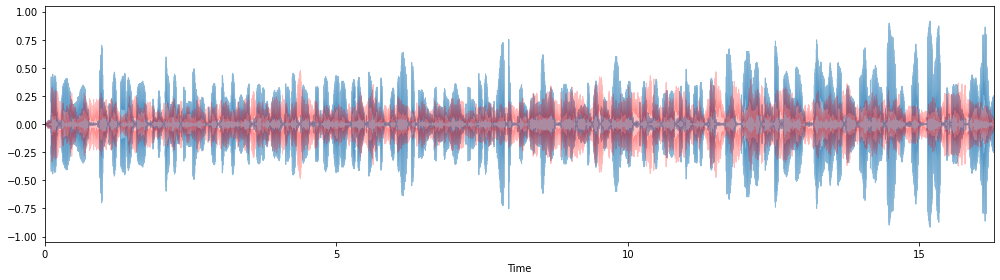

In [272]:

aug = naa.SpeedAug(zone=(0,1), factor=(1,1.5))
augmented_data = aug.augment(data)

librosa_display.waveplot(data, sr=sr, alpha=0.5)
librosa_display.waveplot(augmented_data, sr=sr, color='r', alpha=0.25)

plt.tight_layout()
plt.show()

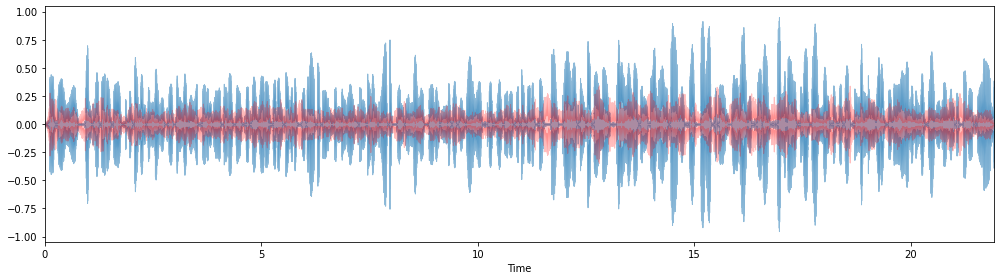

In [274]:

aug = naa.SpeedAug(zone=(0,1), factor=(1,1.5))
augmented_data = aug.augment(augmented_data)

librosa_display.waveplot(data, sr=sr, alpha=0.5)
librosa_display.waveplot(augmented_data, sr=sr, color='r', alpha=0.25)

plt.tight_layout()
plt.show()

52.69075


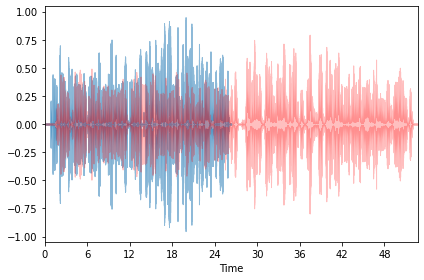

In [6]:

aug = naa.SpeedAug(zone=(0,1), factor=(0.5,1))
augmented_data = aug.augment(data)

librosa_display.waveplot(data, sr=sr, alpha=0.5)
librosa_display.waveplot(augmented_data, sr=sr, color='r', alpha=0.25)

print(len(augmented_data)/sr)
plt.tight_layout()
plt.show()

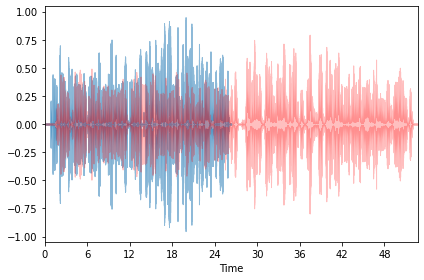

In [26]:

aug = naa.SpeedAug(zone=(0,1), factor=(0.5,0.6))
augmented_data = aug.augment(data)

librosa_display.waveplot(data, sr=sr, alpha=0.5)
librosa_display.waveplot(augmented_data, sr=sr, color='r', alpha=0.25)

plt.tight_layout()
plt.show()

In [243]:
# save_path = "./rm_silence_train_data/"
save_path = "./UNA_DATA"
# file_name = "noise2"
file_name = "loudness2"
        
if not os.path.exists(save_path):
    os.makedirs(save_path)
#     result_name = file_name +"_"+str(0)
# else :
#     files = os.listdir(save_path + file_name)
#     result_name = file_name +"_"+str(len(files))

# result_name=str(file_list[selFileNum])
        
librosa.output.write_wav(save_path + "/" + file_name+".wav", augmented_data, sr)    
print(" Saved File Name : "+file_name)

 Saved File Name : loudness2


In [73]:
from time import sleep

import pickle
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

from matplotlib import cm

from python_speech_features import logfbank, fbank
from python_speech_features import delta


# Library for performing speech recognition
# Python 2.6, 2.7, or 3.3+ (required)
# PyAudio 0.2.11+ (required only if you need to use microphone input, Microphone)
# More : https://github.com/Uberi/speech_recognition
import speech_recognition as sr 

In [170]:
'''
 y: loads and decodes the audio as a time series (one-dimensional NumPy floating point array)
 sr : the sampling rate of y, that is, the number of samples per second of audio
         
 mono=True : 스테레오 타입이면 모노 타입으로 변경 (convert signal to mono)
 duration : only load up to this much audio (in seconds)
'''
file_name = "noise3"
# file_name = "loudness4"

y, sr = librosa.load(save_path + "/" + file_name+".wav", sr=8000, mono=True, duration=50)
n_fft = 512
hop_length = 512
nfilt = 40

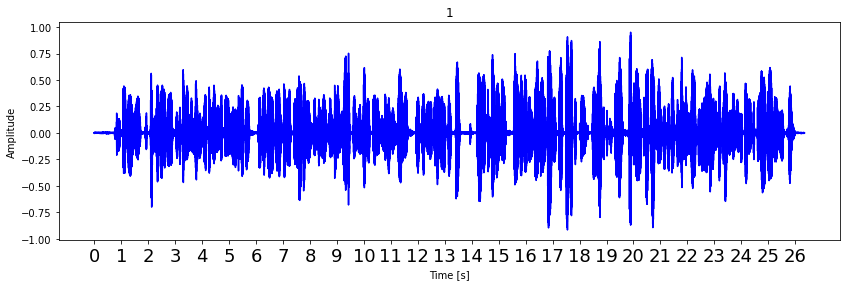

In [87]:
# 0에서 len(y)/sr까지, len(y)개의 요소를 갖는 array
time = np.linspace(0, len(y)/sr, len(y)) # time axis

plt.plot(time, y, color = 'b', label='speech waveform')
plt.xlabel("Time [s]")# x 축
plt.ylabel("Amplitude")# y 축 (진폭)
plt.title(file_name) 
plt.rcParams["figure.figsize"] = (14,4)
plt.xticks(np.arange(0, int(len(y)/sr)+1, step=1), ["{:d}".format(x) for x in np.arange(0, int(len(y)/sr)+1, step=1)], 
           fontsize=18)
plt.show()

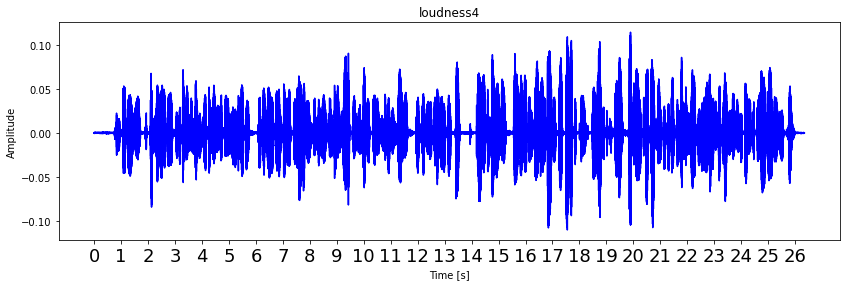

In [163]:
# 0에서 len(y)/sr까지, len(y)개의 요소를 갖는 array
time = np.linspace(0, len(y)/sr, len(y)) # time axis

plt.plot(time, y, color = 'b', label='speech waveform')
plt.xlabel("Time [s]")# x 축
plt.ylabel("Amplitude")# y 축 (진폭)
plt.title(file_name) 
plt.rcParams["figure.figsize"] = (14,4)
plt.xticks(np.arange(0, int(len(y)/sr)+1, step=1), ["{:d}".format(x) for x in np.arange(0, int(len(y)/sr)+1, step=1)], 
           fontsize=18)
plt.show()

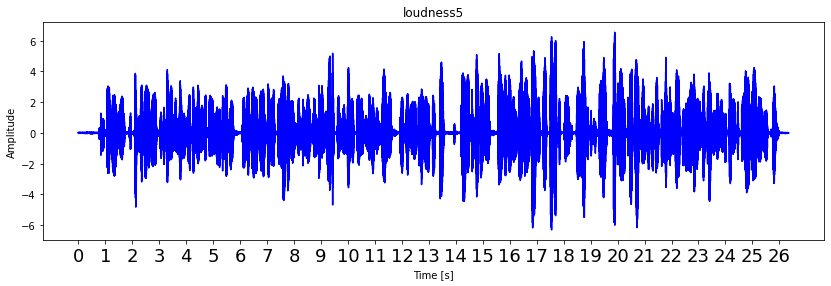

In [161]:
# 0에서 len(y)/sr까지, len(y)개의 요소를 갖는 array
time = np.linspace(0, len(y)/sr, len(y)) # time axis

plt.plot(time, y, color = 'b', label='speech waveform')
plt.xlabel("Time [s]")# x 축
plt.ylabel("Amplitude")# y 축 (진폭)
plt.title(file_name) 
plt.rcParams["figure.figsize"] = (14,4)
plt.xticks(np.arange(0, int(len(y)/sr)+1, step=1), ["{:d}".format(x) for x in np.arange(0, int(len(y)/sr)+1, step=1)], 
           fontsize=18)
plt.show()

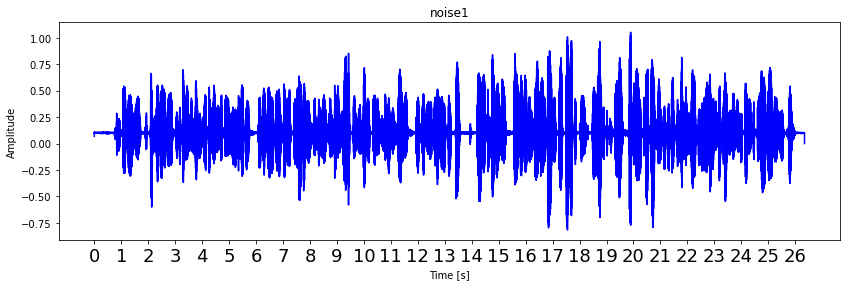

In [143]:
# 0에서 len(y)/sr까지, len(y)개의 요소를 갖는 array
time = np.linspace(0, len(y)/sr, len(y)) # time axis

plt.plot(time, y, color = 'b', label='speech waveform')
plt.xlabel("Time [s]")# x 축
plt.ylabel("Amplitude")# y 축 (진폭)
plt.title(file_name) 
plt.rcParams["figure.figsize"] = (14,4)
plt.xticks(np.arange(0, int(len(y)/sr)+1, step=1), ["{:d}".format(x) for x in np.arange(0, int(len(y)/sr)+1, step=1)], 
           fontsize=18)
plt.show()

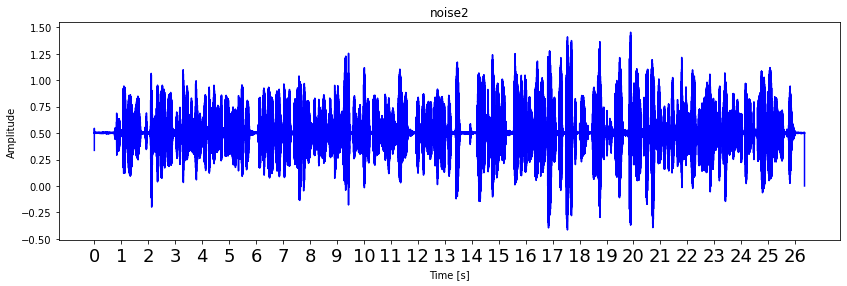

In [149]:
# 0에서 len(y)/sr까지, len(y)개의 요소를 갖는 array
time = np.linspace(0, len(y)/sr, len(y)) # time axis

plt.plot(time, y, color = 'b', label='speech waveform')
plt.xlabel("Time [s]")# x 축
plt.ylabel("Amplitude")# y 축 (진폭)
plt.title(file_name) 
plt.rcParams["figure.figsize"] = (14,4)
plt.xticks(np.arange(0, int(len(y)/sr)+1, step=1), ["{:d}".format(x) for x in np.arange(0, int(len(y)/sr)+1, step=1)], 
           fontsize=18)
plt.show()

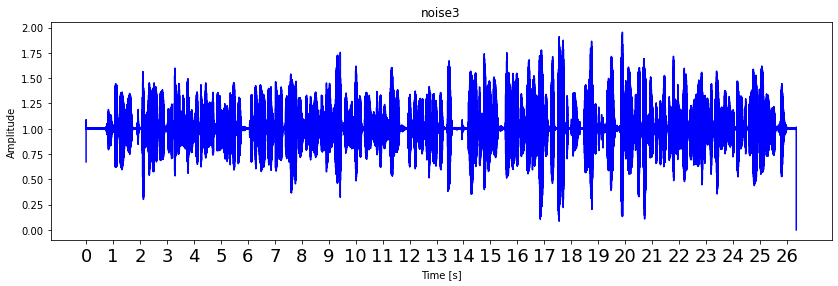

In [171]:
# 0에서 len(y)/sr까지, len(y)개의 요소를 갖는 array
time = np.linspace(0, len(y)/sr, len(y)) # time axis

plt.plot(time, y, color = 'b', label='speech waveform')
plt.xlabel("Time [s]")# x 축
plt.ylabel("Amplitude")# y 축 (진폭)
plt.title(file_name) 
plt.rcParams["figure.figsize"] = (14,4)
plt.xticks(np.arange(0, int(len(y)/sr)+1, step=1), ["{:d}".format(x) for x in np.arange(0, int(len(y)/sr)+1, step=1)], 
           fontsize=18)
plt.show()

In [249]:
27.713794140625033 *0.2

5.542758828125007

In [252]:
27.713794140625033 *0.9

24.942414726562532